In [48]:
using Images,JLD,Knet

In [ ]:
!isdir("data/demo") && include("demosetup.jl")

In [49]:
global atype = Array{Float32}

Array{Float32,N} where N

In [50]:
include("src/newmacnetwork.jl")

scalepixel (generic function with 1 method)

In [51]:
feats,qstsns,dics = loadDemoData("data/demo/");

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


In [52]:
_,wrun,r,_,p = loadmodel("models/demo.jld");

In [53]:
w2i,a2i,i2w,i2a = dics;

In [82]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = feats[:,:,:,rnd:rnd]
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = visualize(wrun,r,feat,question);

In [83]:
answer==prediction

true

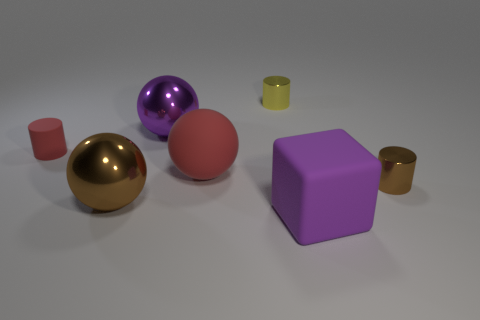

In [84]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [85]:
textq  = i2w[question];
println("Question:\n",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question:
Does the big brown object have the same shape as the small yellow shiny object ?
Answer: no
Prediction: no 


In [80]:
userinput = readline(STDIN)
words = split(userinput)
question = [ w2i[wr] for wr in words]
results,prediction = visualize(wrun,r,feat,question);
println("Prediction: $(i2a[prediction])")

stdin> 


LoadError: [91mBoundsError: attempt to access 0-element Array{Int64,1} at index [1][39m

step_1 most attn. wrds: String["?", "as"]


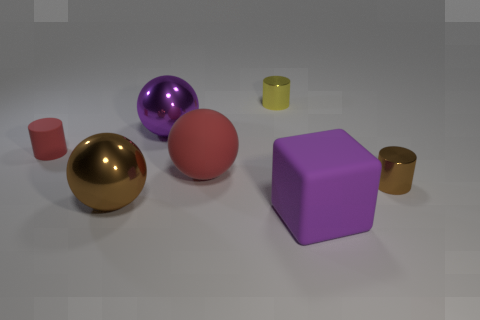

step_2 most attn. wrds: String["?", "the"]


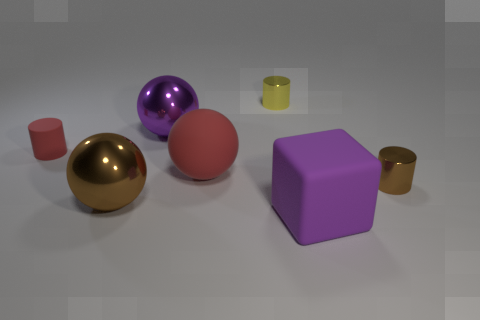

step_3 most attn. wrds: String["?", "as"]


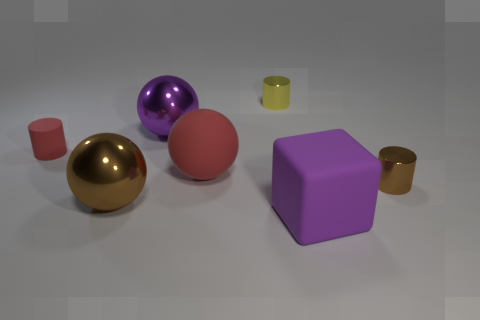

step_4 most attn. wrds: String["?", "the"]


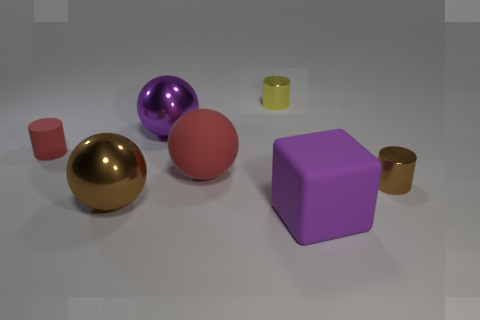

step_5 most attn. wrds: String["?", "the"]


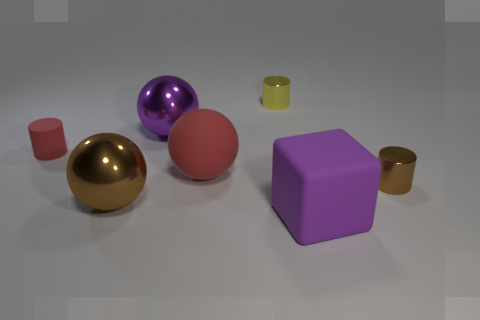

step_6 most attn. wrds: String["?", "shape"]


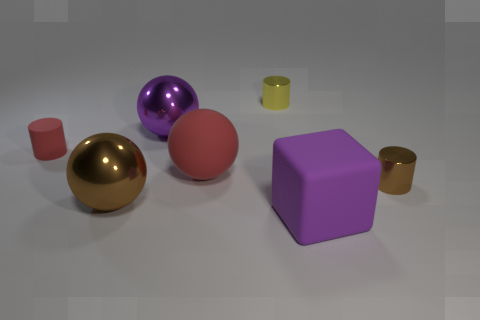

step_7 most attn. wrds: String["yellow", "small"]


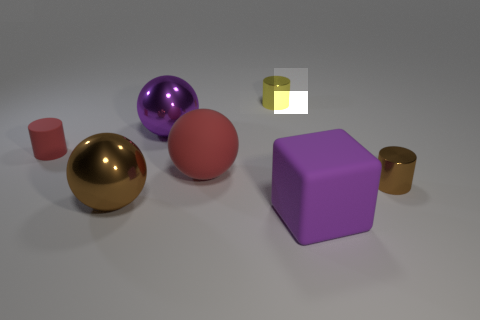

step_8 most attn. wrds: String["Does", "the"]


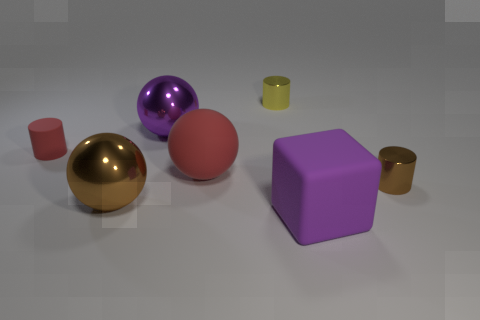

step_9 most attn. wrds: String["brown", "big"]


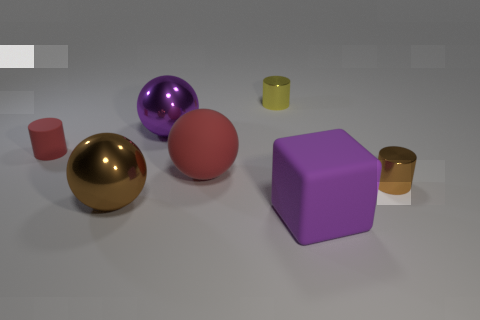

step_10 most attn. wrds: String["brown", "big"]


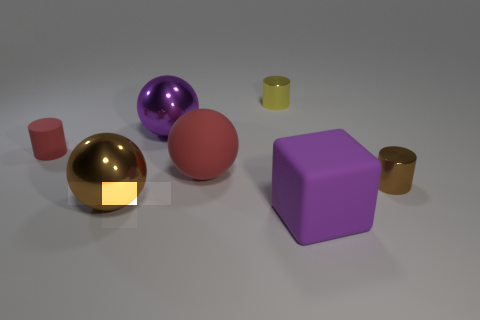

step_11 most attn. wrds: String["?", "Does"]


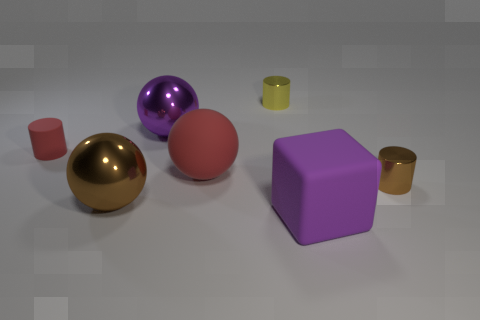

step_12 most attn. wrds: String["?", "the"]


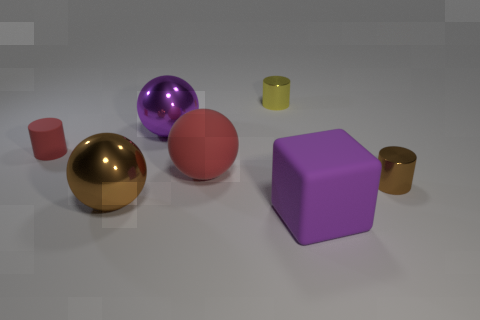

In [86]:
s_y,s_x = size(img)./14
for k=1:12
    α = results["w_attn_$(k)"][:]
    println("step_$(k) most attn. wrds: ",i2w[question[sortperm(α;rev=true)[1:2]]])
    flush(STDOUT)
    display([RGB{N0f8}(α[i],α[i],α[i]) for i=1:length(α)]);
    hsvimg = convert.(HSV,img);
    attn = results["KB_attn_$(k)"]
    for i=1:14,j=1:14
        rngy          = floor(Int,(i-1)*s_y+1):floor(Int,min(i*s_y,320))
        rngx          = floor(Int,(j-1)*s_x+1):floor(Int,min(j*s_x,480))
        hsvimg[rngy,rngx]  = scalepixel.(hsvimg[rngy,rngx],attn[sub2ind((14,14),i,j)])
    end
    display(hsvimg)
end